In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [0]:
covid=pd.read_csv("covid_19_data.csv")

## Data Wrangling

In [13]:
covid.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## check number of rows and columns present in covid19 dataset

In [14]:
covid.shape

(27166, 8)

In [15]:
print(covid.size)

217328


## Check is any values are missing or not

In [16]:
print("Missing Values:", covid.isnull().sum())

Missing Values: SNo                    0
ObservationDate        0
Province/State     14009
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [17]:
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [18]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27166 entries, 0 to 27165
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              27166 non-null  int64  
 1   ObservationDate  27166 non-null  object 
 2   Province/State   13157 non-null  object 
 3   Country/Region   27166 non-null  object 
 4   Last Update      27166 non-null  object 
 5   Confirmed        27166 non-null  float64
 6   Deaths           27166 non-null  float64
 7   Recovered        27166 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.7+ MB


## Drop Sr. No as it is not needed

In [0]:
covid.drop(['SNo'], axis=1, inplace=True)

In [20]:
covid.head(3)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [21]:
covid.isnull().sum()

ObservationDate        0
Province/State     14009
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

## convert ObservationDate in datetime format(yyyy-mm-dd)

In [0]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [23]:
covid["ObservationDate"].head(3)

0   2020-01-22
1   2020-01-22
2   2020-01-22
Name: ObservationDate, dtype: datetime64[ns]

## Grouping different types of cases according to date

In [0]:
datewise=covid.groupby(covid["ObservationDate"]).agg({"Confirmed":"sum",
                                              "Deaths":"sum",
                                               "Recovered":"sum"})

In [25]:
print("Confirmed cases datewise:", datewise['Confirmed'].iloc[-1])
print("Death cases datewise:", datewise['Deaths'].iloc[-1])
print("Recovered cases datewise:", datewise['Recovered'].iloc[-1])

Confirmed cases datewise: 4996472.0
Death cases datewise: 328115.0
Recovered cases datewise: 1897466.0


## Number of active cases in the world

In [26]:
print("Number of Active cases around the world:", datewise["Confirmed"].iloc[-1]-
                                 datewise["Deaths"].iloc[-1]-
                                 datewise["Recovered"].iloc[-1])

Number of Active cases around the world: 2770891.0


## Total  Number of closed cases around the world

In [27]:
print("Total number of closed cases aroundthe world:",datewise["Deaths"].iloc[-1]+
                                                      datewise["Recovered"].iloc[-1])

Total number of closed cases aroundthe world: 2225581.0


## Number of confirmed/Death/Recovered cases in last 24 Hours![alt text](https://)

In [28]:
print("Number of confirmed cases in last 24 hours:",datewise["Confirmed"].iloc[-1]-
                                                    datewise["Confirmed"].iloc[-2])

Number of confirmed cases in last 24 hours: 98980.0


In [29]:
print("Number of recovered cases in last 24 hours:",datewise["Recovered"].iloc[-1]-
                                                    datewise["Recovered"].iloc[-2])

Number of recovered cases in last 24 hours: 58471.0


In [30]:
print("Number of Death cases in last 24 hours:", datewise["Deaths"].iloc[-1]-
                                                  datewise["Deaths"].iloc[-2])

Number of Death cases in last 24 hours: 4830.0


## Visualization

Text(0, 0.5, 'Active cases')

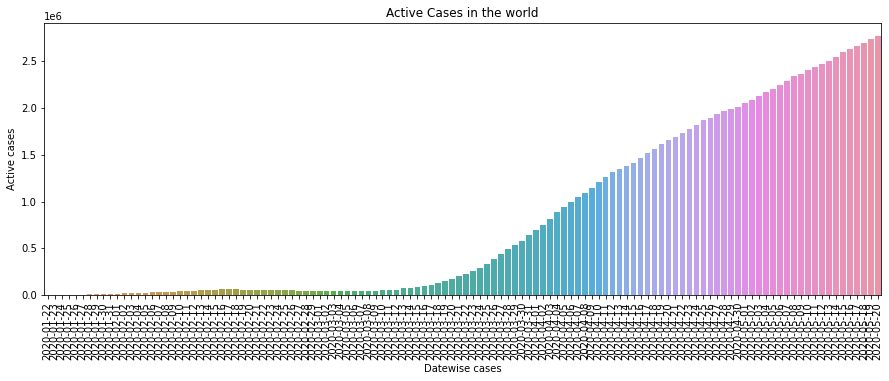

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Deaths"]-datewise["Recovered"])
plt.title("Active Cases in the world")
plt.xticks(rotation=90)
plt.xlabel("Datewise cases")
plt.ylabel("Active cases")

Text(0, 0.5, 'Recovered cases')

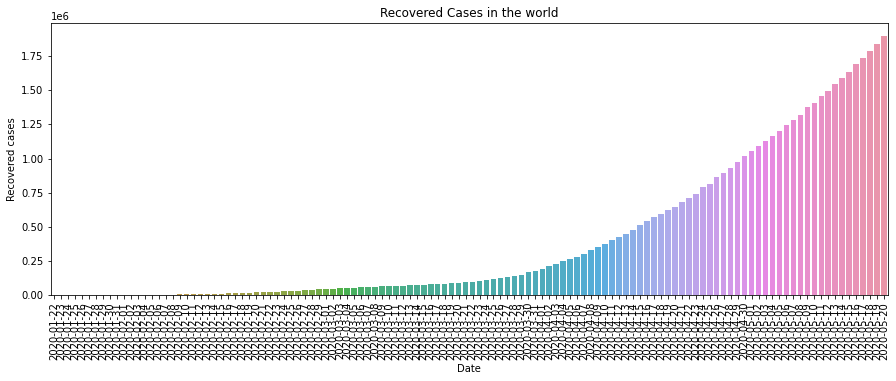

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"])
plt.title("Recovered Cases in the world")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Recovered cases")

Text(0, 0.5, 'Death cases')

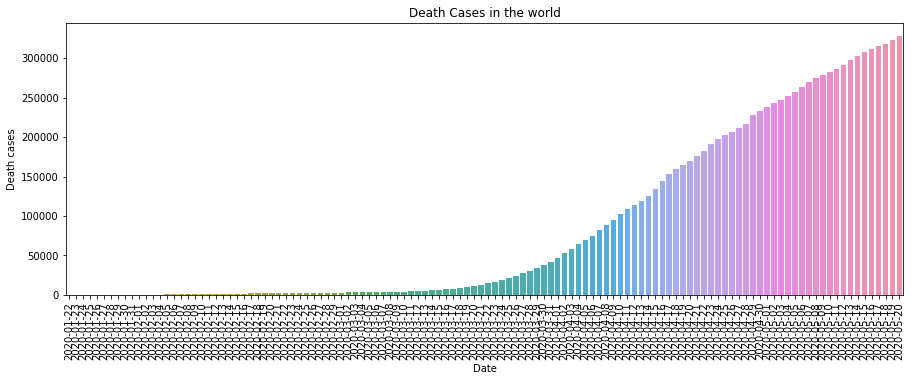

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Deaths"])
plt.title("Death Cases in the world")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Death cases")

## Weekwise Visualization

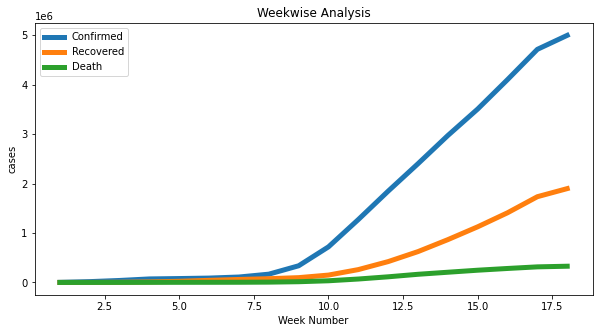

In [34]:
datewise["week_of_year"]=datewise.index.weekofyear   #from timedelta function
week_num=[]
week_confirmed_cases=[]
week_recovered_cases=[]
week_deaths_cases=[]
week=1
for i in list(datewise["week_of_year"].unique()):
    week_confirmed_cases.append(datewise[datewise["week_of_year"]==i]["Confirmed"].iloc[-1])
    week_recovered_cases.append(datewise[datewise["week_of_year"]==i]["Recovered"].iloc[-1])
    week_deaths_cases.append(datewise[datewise["week_of_year"]==i]["Deaths"].iloc[-1])
    week_num.append(week)
    week=week+1
plt.figure(figsize=(10,5))
plt.plot(week_num,week_confirmed_cases,linewidth=5,label="Confirmed")
plt.plot(week_num,week_recovered_cases,linewidth=5,label="Recovered")
plt.plot(week_num,week_deaths_cases,linewidth=5,label="Death")
plt.title("Weekwise Analysis")
plt.xlabel("Week Number")
plt.ylabel("cases")
plt.legend()

Text(0, 0.5, 'Deaths cases')

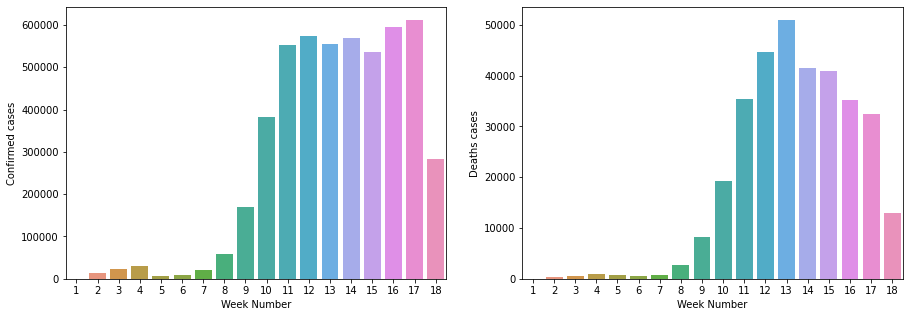

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(week_confirmed_cases).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num, y=pd.Series(week_deaths_cases).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax1.set_ylabel("Confirmed cases")
ax2.set_xlabel("Week Number")
ax2.set_ylabel("Deaths cases")


Text(0.5, 0, 'week number')

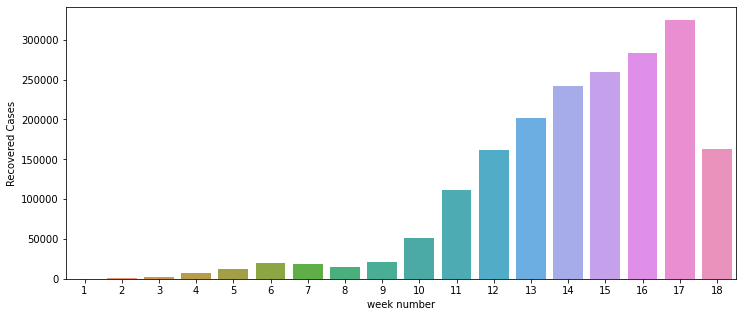

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(x=week_num,y=pd.Series(week_recovered_cases).diff().fillna(0))
plt.ylabel("Recovered Cases")
plt.xlabel("week number")

## Average Confirmed/Recovered/Daily cases Daily

In [37]:
print("Average confirmed cases daily:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average recovered cases daily:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average Deaths cases daily:",np.round(datewise["Deaths"].diff().fillna(0).mean()))


Average confirmed cases daily: 41633.0
Average recovered cases daily: 15812.0
Average Deaths cases daily: 2734.0


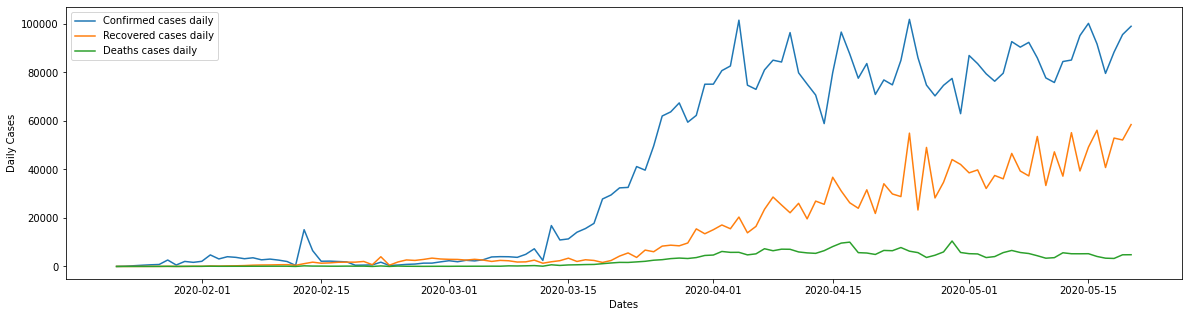

In [38]:
plt.figure(figsize=(20,5))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Confirmed cases daily")
plt.plot(datewise["Recovered"].diff().fillna(0),label="Recovered cases daily")
plt.plot(datewise["Deaths"].diff().fillna(0),label="Deaths cases daily")
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Daily Cases")
plt.show()

## Countrywise Analysis

In [0]:
countrywise=covid[covid["ObservationDate"]== covid["ObservationDate"]].groupby(["Country/Region"]).agg(
    {"Confirmed":"sum","Recovered":"sum", "Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)

In [40]:
countrywise.head(5)

,Confirmed,Recovered,Deaths
Country/Region,,,
US,47304994.0,6287725.0,2576920.0
Spain,10597080.0,4952994.0,1134045.0
Italy,10517134.0,3517985.0,1371633.0
Mainland China,8303918.0,6262118.0,356478.0
Germany,7965411.0,5142771.0,270010.0


In [0]:
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100


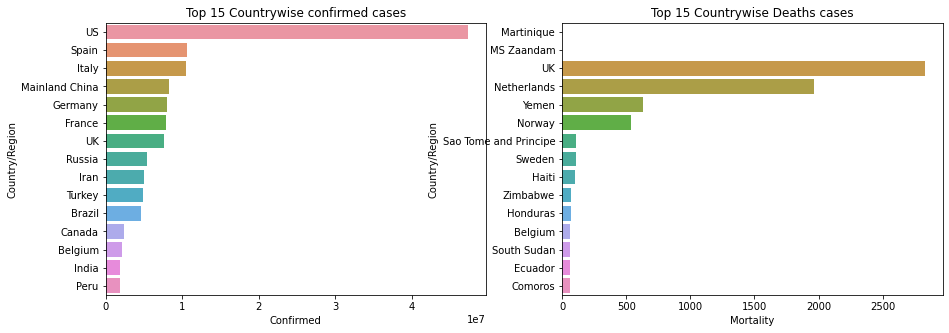

In [42]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
top_15_countries_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_countries_mortality=countrywise.sort_values(["Mortality"],ascending=False).head(15)
top_15_countries_recovered=countrywise.sort_values(["Recovered"],ascending=False).head(15)
sns.barplot(x=top_15_countries_confirmed["Confirmed"],y=top_15_countries_confirmed.index,ax=ax1)
ax1.set_title("Top 15 Countrywise confirmed cases")
ax2.set_title("Top 15 Countrywise Deaths cases")
sns.barplot(x=top_15_countries_mortality["Mortality"],y=top_15_countries_mortality.index,ax=ax2)
plt.show()

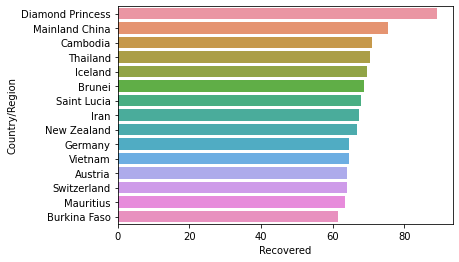

In [43]:
sns.barplot(x=top_15_countries_recovered["Recovered"],y=top_15_countries_recovered.index)

## Analysis of COVID19 in India 

In [0]:
India_data=covid[covid["Country/Region"]=='India']

In [0]:
datewise_India_data=India_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                                    "Recovered":"sum",
                                                                    "Deaths":"sum"})

In [46]:
print(datewise_India_data.iloc[-1])

Confirmed    112028.0
Recovered     45422.0
Deaths         3434.0
Name: 2020-05-20 00:00:00, dtype: float64


In [47]:
print("Total active cases in India:", datewise_India_data["Confirmed"].iloc[-1]
      -datewise_India_data["Recovered"].iloc[-1]-datewise_India_data["Deaths"].iloc[-1])

Total active cases in India: 63172.0


In [48]:
print("Total closed cases in India:", datewise_India_data["Recovered"].iloc[-1]+datewise_India_data["Deaths"].iloc[-1])

Total closed cases in India: 48856.0


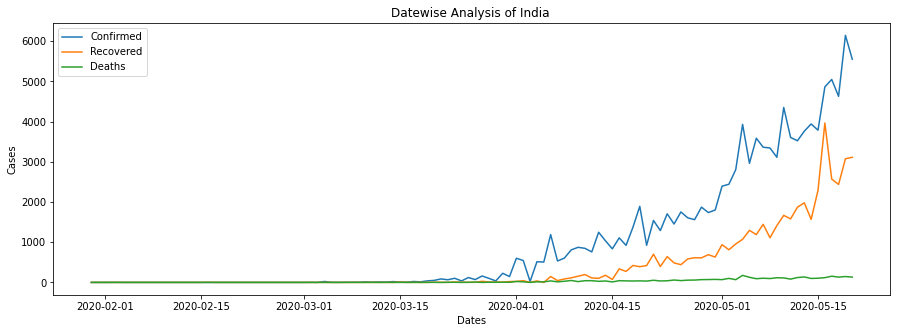

In [49]:
plt.figure(figsize=(15,5))
plt.plot(datewise_India_data["Confirmed"].diff().fillna(0),label="Confirmed")
plt.plot(datewise_India_data["Recovered"].diff().fillna(0),label="Recovered")
plt.plot(datewise_India_data["Deaths"].diff().fillna(0),label="Deaths")
plt.legend()
plt.title("Datewise Analysis of India ")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.show()


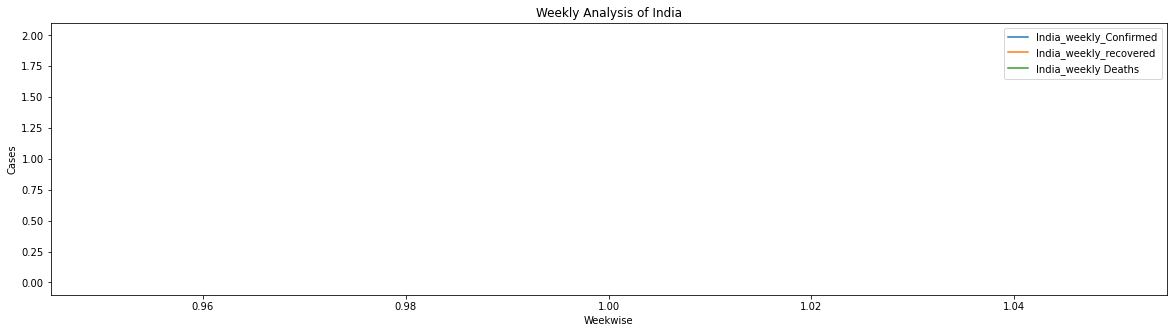

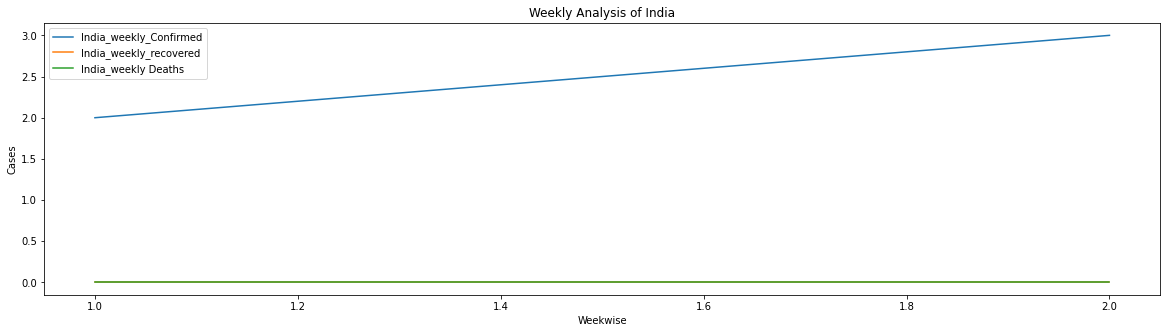

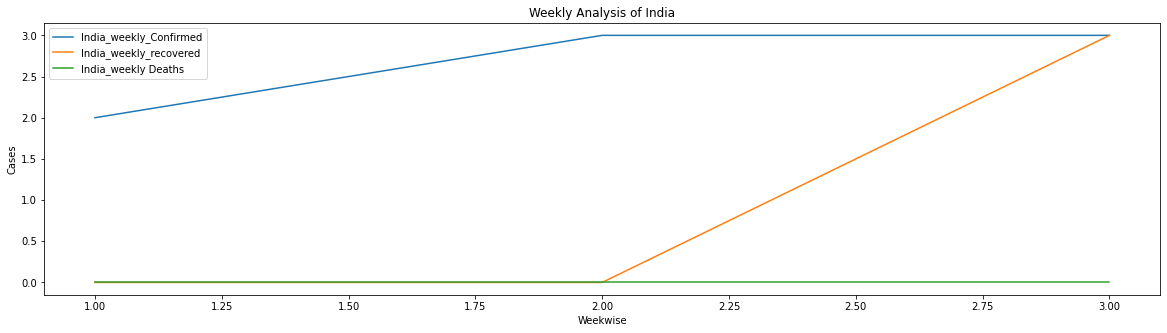

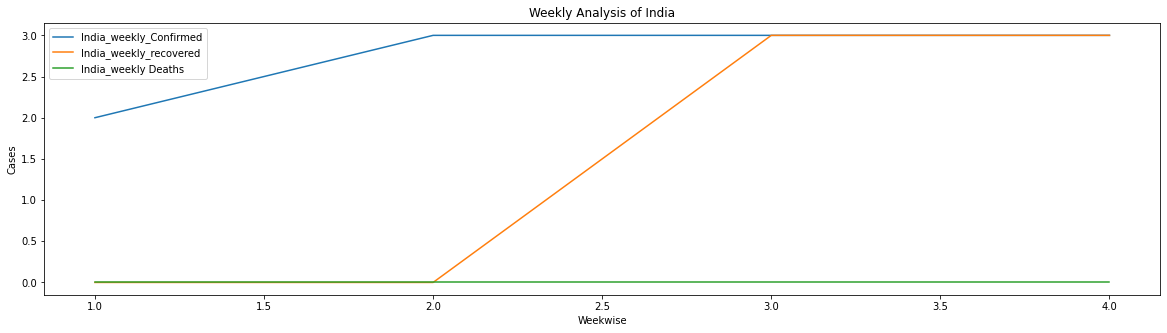

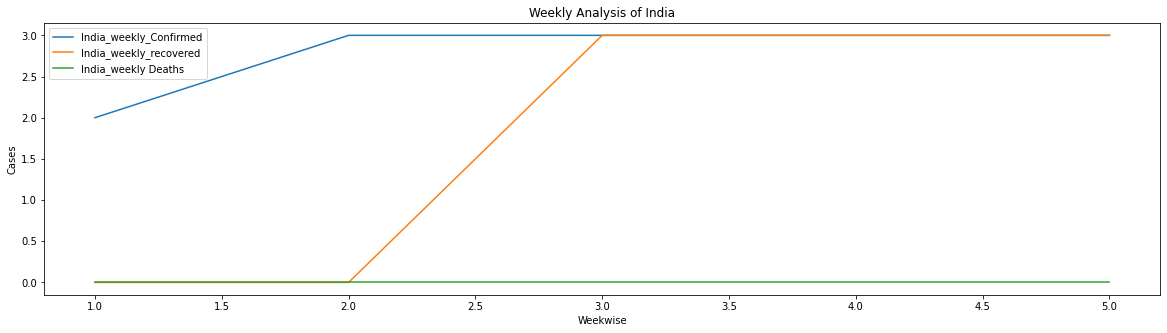

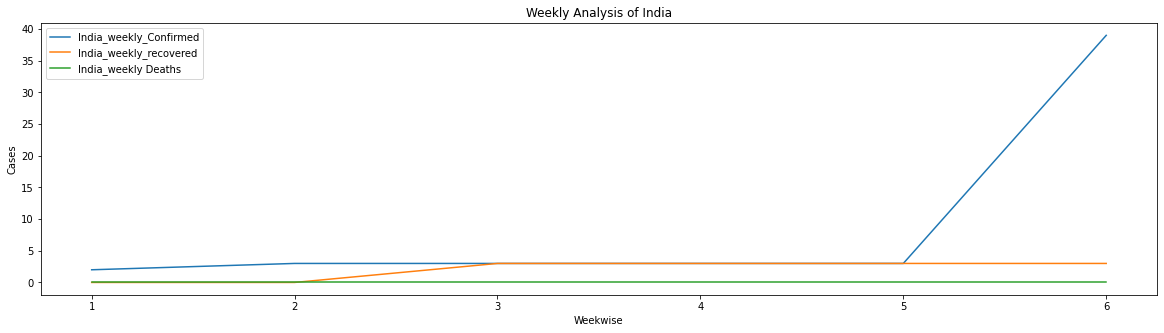

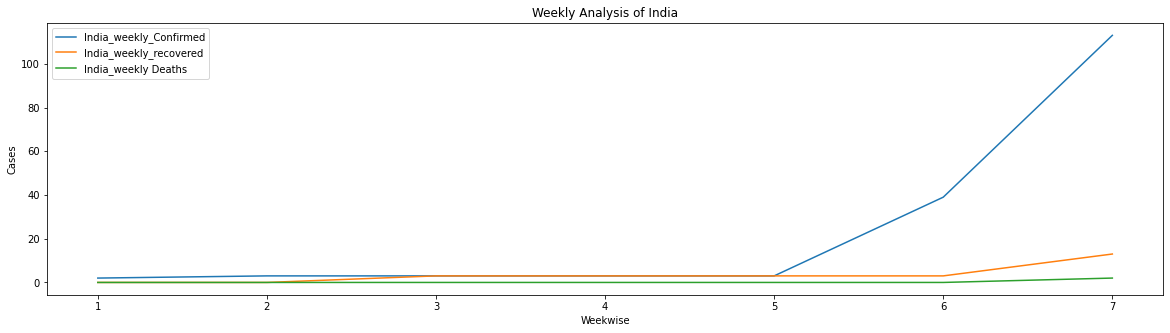

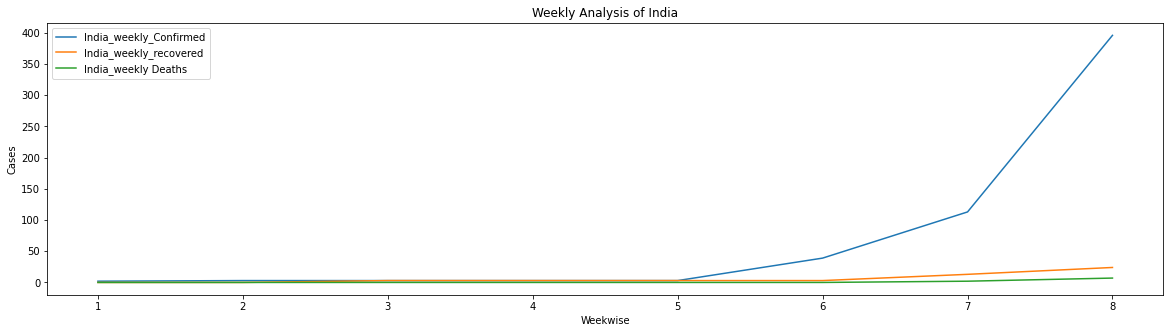

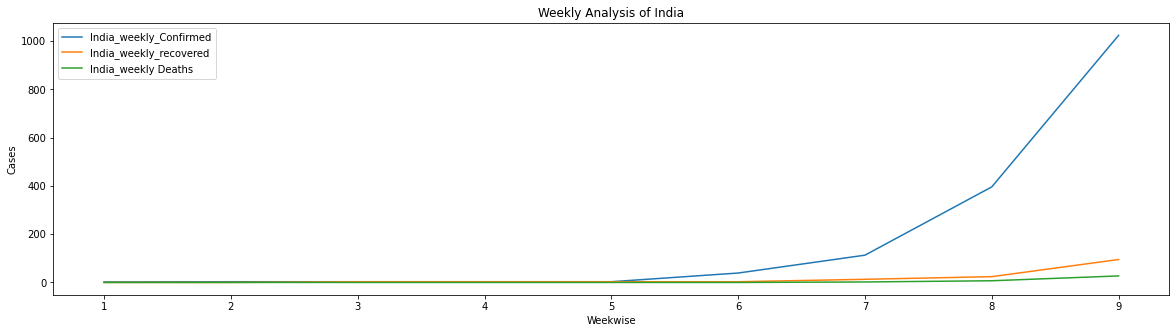

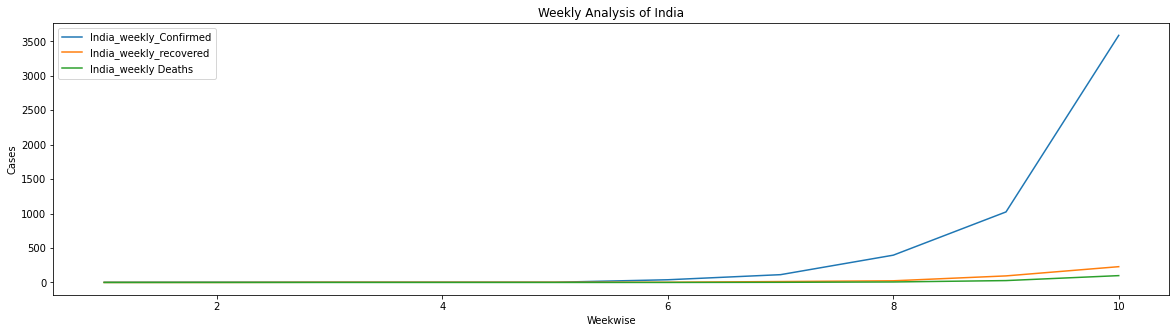

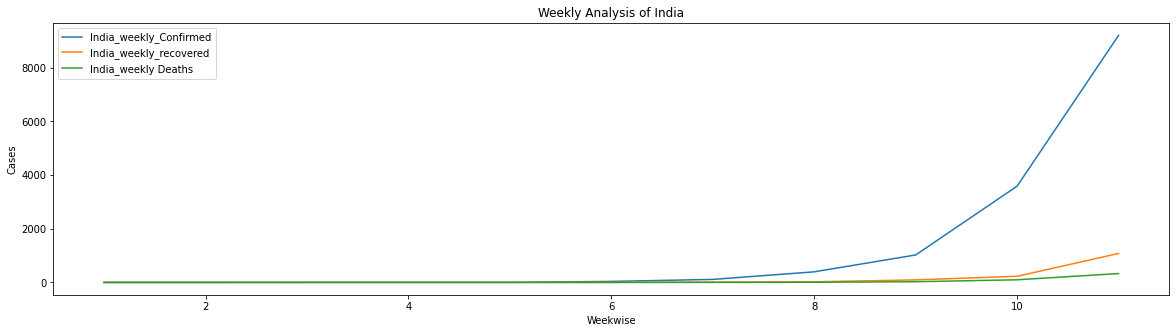

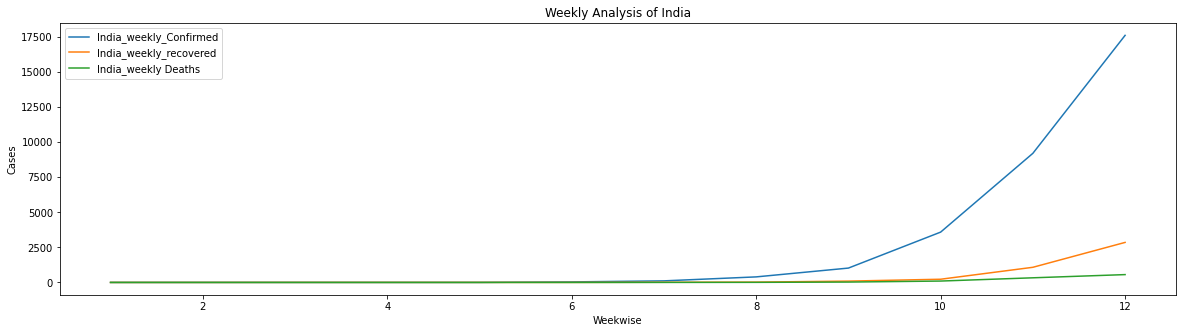

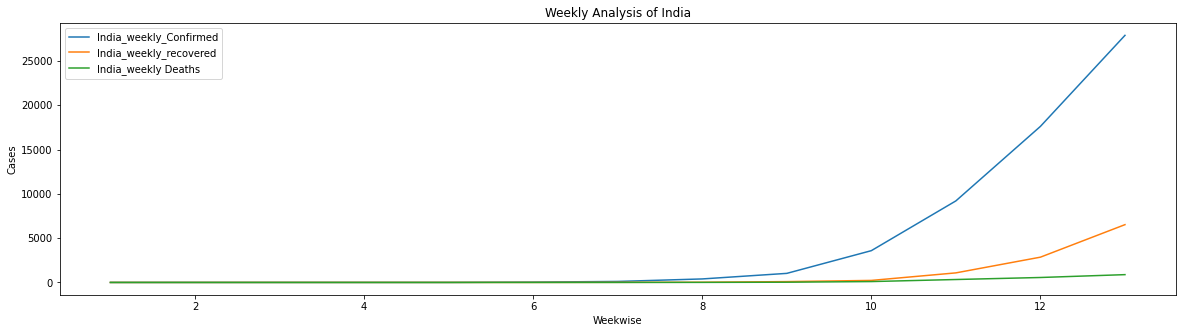

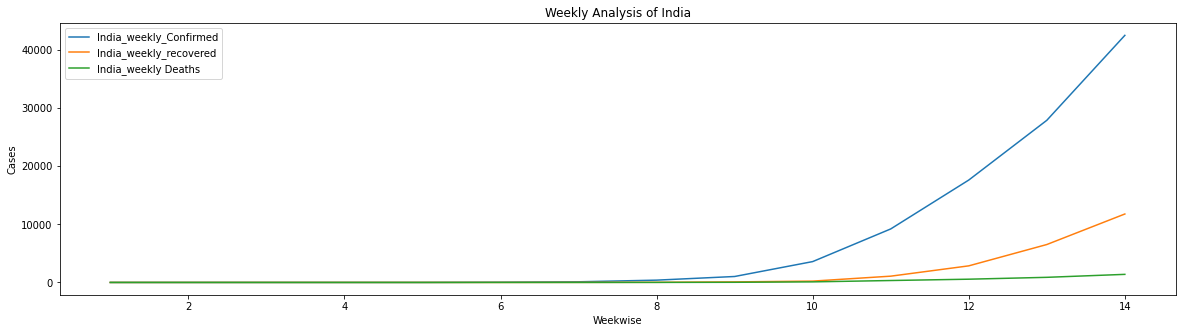

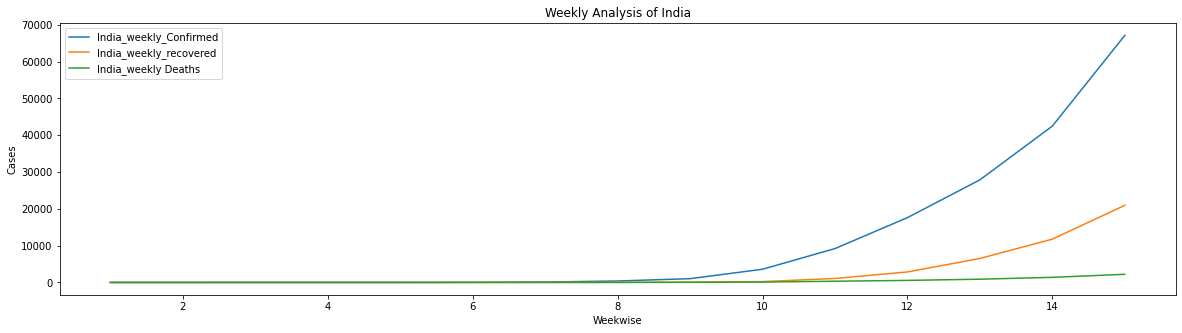

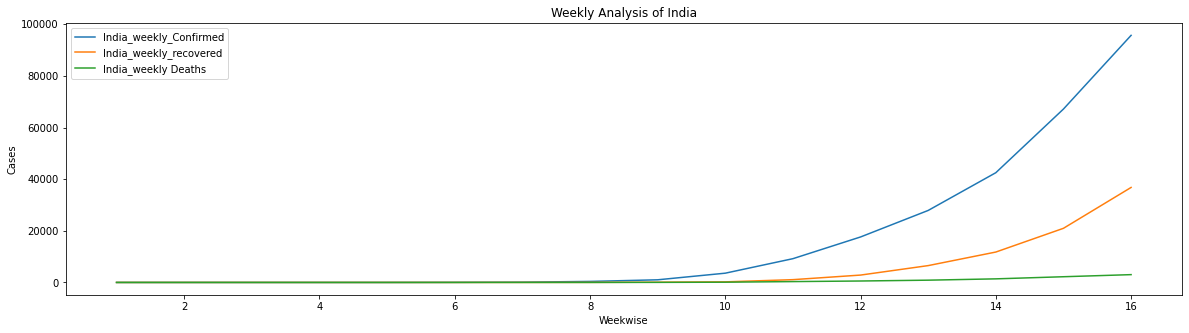

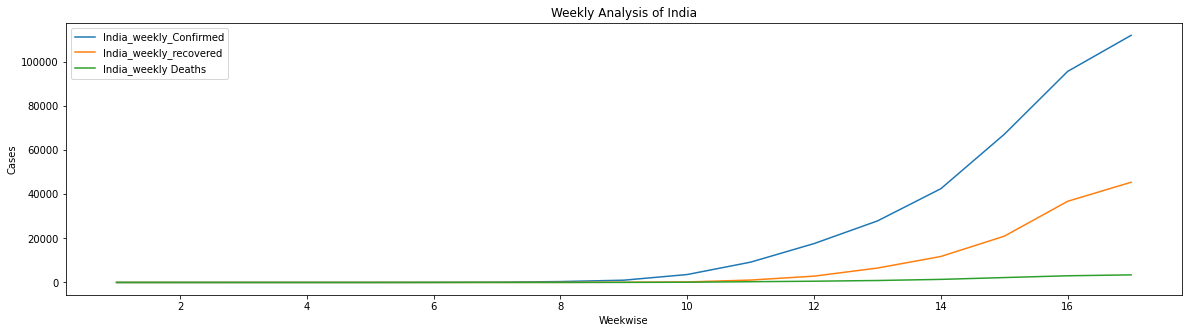

In [62]:
datewise_India_data["week_of_year"]=datewise_India_data.index.weekofyear 
India_week_no=[]
India_weekly_Confirmed=[]
India_weekly_Recovered=[]
India_weekly_Deaths=[]
weekno=1
for i in list(datewise_India_data["week_of_year"].unique()):
      India_weekly_Confirmed.append(datewise_India_data[datewise_India_data["week_of_year"]==i]["Confirmed"].iloc[-1])
      India_weekly_Recovered.append(datewise_India_data[datewise_India_data["week_of_year"]==i]["Recovered"].iloc[-1])
      India_weekly_Deaths.append(datewise_India_data[datewise_India_data["week_of_year"]==i]["Deaths"].iloc[-1])
      India_week_no.append(weekno)
      weekno=weekno + 1
      plt.figure(figsize=(20,5))
      plt.plot(India_week_no,India_weekly_Confirmed, label="India_weekly_Confirmed" )
      plt.plot(India_week_no,India_weekly_Recovered,label="India_weekly_recovered")
      plt.plot(India_week_no, India_weekly_Deaths,label="India_weekly Deaths")
      plt.title("Weekly Analysis of India")
      plt.xlabel("Weekwise")
      plt.ylabel("Cases")
      plt.legend()
      plt.show()

## Analysis of COVID19 in US

In [0]:
US_data=covid[covid["Country/Region"]=="US"]

In [0]:
datewise_US_data=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                           "Recovered":"sum",
                                                           "Deaths":"sum"})

In [68]:
print(datewise_US_data.iloc[-1])

Confirmed    1551853.0
Recovered     294312.0
Deaths         93439.0
Name: 2020-05-20 00:00:00, dtype: float64


In [69]:
print("Active cases of US:",datewise_US_data["Confirmed"].iloc[-1]-datewise_US_data["Recovered"].iloc[-1]-
                            datewise_US_data["Deaths"].iloc[-1])

Active cases of US: 1164102.0


In [70]:
print("Closed cases of US:", datewise_US_data["Recovered"].iloc[-1]+datewise_US_data["Deaths"].iloc[-1])

Closed cases of US: 387751.0


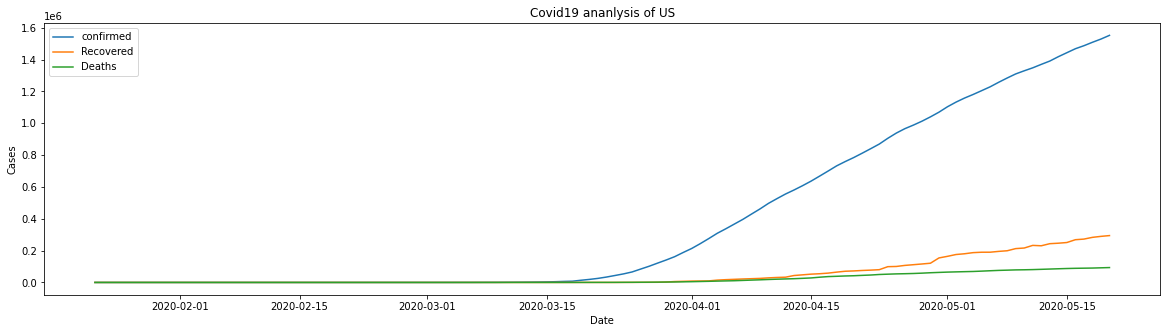

In [71]:
plt.figure(figsize=(20,5))
plt.plot(datewise_US_data["Confirmed"], label="confirmed")
plt.plot(datewise_US_data["Recovered"], label="Recovered")
plt.plot(datewise_US_data["Deaths"], label="Deaths")
plt.title("Covid19 ananlysis of US")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()

## How many days US took to reach cases equivalent to India

In [0]:
max_India=datewise_India_data["Confirmed"].max()

In [97]:
print("US took", datewise_US_data[(datewise_US_data["Confirmed"]>0) & (datewise_US_data["Confirmed"]<= max_India)].shape[0],"days to reach confirmed cases",max_India)
print("India took", datewise_India_data[datewise_India_data["Confirmed"]>0].shape[0],"days to reach confirmed cases",max_India)

US took 66 days to reach confirmed cases 112028.0
India took 112 days to reach confirmed cases 112028.0


## Apply Linear Regression Model

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
datewise["Since day"]=datewise.index-datewise.index[0]  #current index - first index

In [0]:
datewise["Since day"]=datewise["Since day"].dt.days   #in days

In [0]:
train_model=datewise.iloc[:int(datewise.shape[0]*0.95)]
model_val=datewise[int(datewise.shape[0]*0.95):]
model_score=[]

In [0]:
lin_reg=LinearRegression(normalize=True)

In [136]:
lin_reg.fit(np.array(train_model["Since day"]).reshape(-1,1), np.array(train_model["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
predict=lin_reg.predict(np.array(model_val["Since day"]).reshape(-1,1))

In [0]:
model_score.append(np.sqrt(mean_squared_error(model_val["Confirmed"],predict)))

In [139]:
print("RMS of Linear Regression:.", np.sqrt(mean_squared_error(model_val["Confirmed"],predict)))

RMS of Linear Regression:. 1366153.185485333


In [0]:
## error is so large so transform it

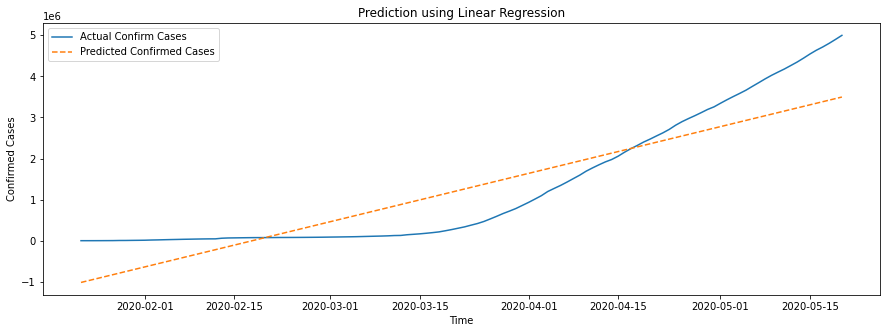

In [142]:
plt.figure(figsize=(15,5))
predict_linreg=lin_reg.predict(np.array(datewise["Since day"]).reshape(-1,1))
plt.plot(datewise["Confirmed"], label="Actual Confirm Cases")
plt.plot(datewise.index,predict_linreg,label="Predicted Confirmed Cases", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.title("Prediction using Linear Regression")
plt.legend()
plt.show()

## Linear Regression Failed because initially data was flatten 

## Apply Polynomial

In [0]:
polynomial=PolynomialFeatures(degree=8)

In [0]:
train_poly=polynomial.fit_transform(np.array(train_model["Since day"]).reshape(-1,1))
valid_poly=polynomial.fit_transform(np.array(model_val["Since day"]).reshape(-1,1))
model_rmse=[]

In [0]:
y=train_model["Confirmed"]

In [154]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
predict_poly=linreg.predict(valid_poly)

In [0]:
rmse_poly=np.sqrt(mean_squared_error(model_val["Confirmed"],predict_poly))  #apply val of previous LR

In [0]:
model_rmse.append(rmse_poly)

In [167]:
print("RMSE of Polynomial:",model_rmse)

RMSE of Polynomial: [53262.68274761107]


## RMSE Gradually reduced

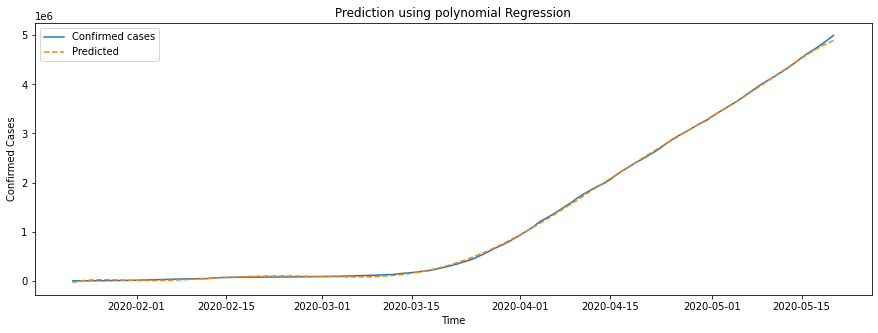

In [172]:
plt.figure(figsize=(15,5))
compare_data=polynomial.fit_transform(np.array(datewise["Since day"]).reshape(-1,1))
predictionpoly=linreg.predict(compare_data)
plt.plot(datewise["Confirmed"], label="Confirmed cases")
plt.plot(datewise.index,predictionpoly, linestyle='--', label="Predicted")
plt.title("Prediction using polynomial Regression")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

## In this case polynomial regression is mapping the data

In [0]:
new_date=[]
new_predict_lr=[]
new_predict_poly=[]
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_predict_lr.append(lin_reg.predict(np.array(datewise["Since day"].max()+i).reshape(-1,1))[0][0])
  new_date_poly=polynomial.fit_transform(np.array(datewise["Since day"].max()+i).reshape(-1,1))
  new_predict_poly.append(linreg.predict(new_date_poly)[0])

In [0]:
pd.set_option('display.float_format',lambda x:'%.f' %x)                #set_option for setting multiple values
#data is nonlinear so we are going for transform
model_prediction=pd.DataFrame(zip(new_date,new_predict_lr,new_predict_poly), columns=["Date","Linear Regression",'Polynomial'])

In [191]:
model_prediction.head(15)

,Date,Linear Regression,Polynomial
0,2020-05-21,3533760,4937018
1,2020-05-22,3571669,4967582
2,2020-05-23,3609578,4980051
3,2020-05-24,3647487,4970644
4,2020-05-25,3685396,4935063
5,2020-05-26,3723305,4868454
6,2020-05-27,3761214,4765353
7,2020-05-28,3799124,4619635
8,2020-05-29,3837033,4424462
9,2020-05-30,3874942,4172224


## Small difference in predicted data using Polynomial Regression

## Time Series

In [0]:
train= datewise.iloc[:int(datewise.shape[0]*0.95)]
val=datewise.iloc[int(datewise.shape[0]*0.95):]

In [0]:
from statsmodels.tsa.api import Holt

In [0]:
holt=Holt(np.asarray(train["Confirmed"])).fit(smoothing_level=0.3,smoothing_slope=0.5, optimized=False)

In [0]:
y_pred=val.copy()

In [0]:
y_pred["Holt"]=holt.forecast(len(val))

In [0]:
modelscore=[]

In [0]:
modelscore.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

In [203]:
print("RMSE of TS:",modelscore)

RMSE of TS: [30910.12119085982]


## RMSE is Drastically reduced in TS

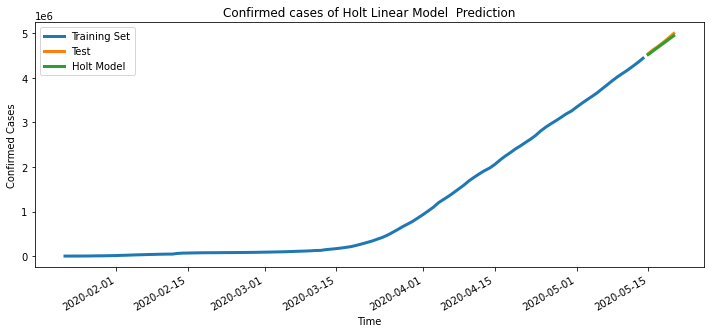

In [207]:
plt.figure(figsize=(12,5))
plt.plot(train.Confirmed,label="Training Set", linewidth=3)
val.Confirmed.plot(label="Test", linewidth=3)
y_pred.Holt.plot(label="Holt Model", linewidth=3)
plt.title("Confirmed cases of Holt Linear Model  Prediction")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

In [215]:
holt_new_date=[]
holt_new_predict=[]
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_new_predict.append(holt.forecast((len(val)+i))[-1])
model_prediction["Holt Model"]=holt_new_predict
print(model_prediction.head(15))

         Date  Linear Regression  Polynomial  Holt Model
0  2020-05-21            3533760     4937018     5031221
1  2020-05-22            3571669     4967582     5115759
2  2020-05-23            3609578     4980051     5200298
3  2020-05-24            3647487     4970644     5284836
4  2020-05-25            3685396     4935063     5369375
5  2020-05-26            3723305     4868454     5453913
6  2020-05-27            3761214     4765353     5538452
7  2020-05-28            3799124     4619635     5622991
8  2020-05-29            3837033     4424462     5707529
9  2020-05-30            3874942     4172224     5792068
10 2020-05-31            3912851     3854479     5876606
11 2020-06-01            3950760     3461888     5961145
12 2020-06-02            3988669     2984151     6045683
13 2020-06-03            4026578     2409935     6130222
14 2020-06-04            4064487     1726801     6214760


## Using Time Series Analysis we got exact result